<a href="https://colab.research.google.com/github/Kumail00Alawa/KAUST_AI_WEEK/blob/main/%E2%80%9CBohrsAtomicModel_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expectation: A working solution where the learned function using Linear Regression is close to the training data points.



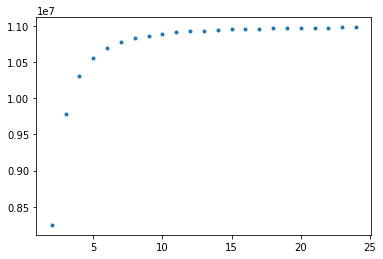

In [ ]:
#[Fictional Story] The data for the hydrogen spectrum was provided to a statistcain and he/She decided to use linear regression
#model for finding the relation between the hydrogen spectrum and the hydrogen shell. The statistican wants to find the relatioship between 
#the shell from which the electron jumps (ni) to the first shell and the spatial frequency (sf). He/She tries to fit 2-7 order polynomial to the data.
import numpy as np
import matplotlib.pyplot as plt


ni=np.arange(2,25)

sf=[(1.1*10**7)*(1/(1)**2 -1/(i)**2) for i in ni] 
plt.plot(ni,sf,'.')
plt.show()

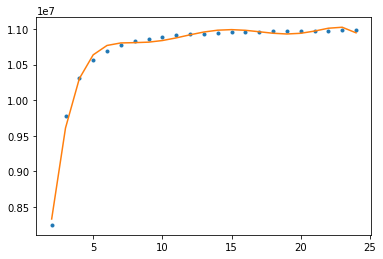

In [ ]:
# the easiest way is to use library
from sklearn.linear_model import LinearRegression

estimator = LinearRegression(fit_intercept=False)

polynomial_order = 7
order_list = np.array([ni**i for i in range(polynomial_order)])
inputs = np.stack(order_list, axis=1)
outputs = np.array(sf)

estimator.fit(inputs, outputs)

coefficient = estimator.coef_

pred_y = inputs @ coefficient
plt.plot(ni, sf,'.')
plt.plot(ni, pred_y)
plt.show()

(7, 7)


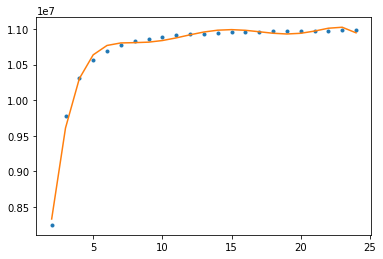

In [ ]:
# if we want to write by ourselves

# data list X: shape [N, n], (have N samples, each one has n values)
# target list Y: shape [N, 1], (have N samples, each one has 1 values)
# coefficient matrix A: [n, 1], (have n variable)

# in our case: N=len(t), n=1, A has only variable gmoon

# math theory: (@ is the matrix dot)
# pred_Y = X @ A
# mse = mean((pred_Y - Y)**2) 

# written in matrix
# mse = (X @ A - Y).T @ (X @ A - Y)
# d(mse)/d(A) = 2 * X.T @ (Y - X @ A)

# let d(mse)/d(A)==0, now we get the same equation in slides (p41)
# A = (X.T @ X) ** -1 @ X.T @ Y

# use the equation in slides (p41)
X = inputs
Y = outputs

A = np.linalg.inv(X.T @ X) @ X.T @ Y
pred_y = X @ A

plt.plot(ni, sf,'.')
plt.plot(ni, pred_y)
plt.show()